# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

### (1) Definition of unified probability interval

Assuming Gausian probability distribution with physical bound on true mean

In [2]:
# Variable pdf width!!!
# Absolute precision better for small than for large energy

def sigma(mean):
    sig = np.sqrt(1.+0.1*mean*mean)
    return sig

# Return unified interval corresponsing to given CL

def problim(mean,cl):
    
# Find sum range required for % level precision

    prec = 0.001*(1-cl)

    sig = sigma(mean)
    xmin = mean+sig*norm.isf(1-prec)
    xmax = mean+sig*norm.isf(prec)

    nbin=1000
    dx=(xmax-xmin)/nbin
    
# Considered interval candidates

    xtab = np.linspace(xmin+0.5*dx,xmax-0.5*dx,nbin)
    ptab = norm.pdf(xtab,mean,sig)

# Highest likelihood for each candidate

    xbest = xtab * (xtab > 0.)
    sbest = sigma(xbest)
    pbest = norm.pdf(xtab,xbest,sbest)
    
# Sort candidates according to the probability ratio

    prat = ptab/pbest
    
    isort= np.argsort(prat)

    xlo=xmax
    xhi=xmin
    psum=0

    
    for ip in reversed(isort):
        psum += dx*ptab[ip]
        if(xlo>xtab[ip]): xlo=xtab[ip]
        if(xhi<xtab[ip]): xhi=xtab[ip]
        if(psum>cl): break
        
    return xlo-dx/2.,xhi+dx/2.

# Help function to check coverage

def probsum(mean,x1,x2):
    sig = sigma(mean)
    p12= norm.cdf(x2,mean,sig) - norm.cdf(x1,mean,sig)
    return p12


### (2) Define set of hypothesis

In [3]:
# Considered values of true mean

# vmean = np.linspace(0.,6.,13)
# vmean = np.linspace(0.,6.,121)
vmean = np.linspace(0.,6.,601)

CL = 0.90

# Upper an lower edges of x probability intervals

vlow = np.empty(vmean.size)
vhig = np.empty(vmean.size)

for im in range(vmean.size):
    vlow[im],vhig[im] = problim(vmean[im],CL)


### (3)  Print interval information

In [4]:
print("\nProbability intervals for x:")

print("\n  true mean     n_low     n_high    CL")

for im in range(vmean.size) :
    ucl = probsum(vmean[im],vlow[im],vhig[im])
    
    print ("%10.3f   %8.3f  %8.3f     %8.6f" % (vmean[im],vlow[im],vhig[im],ucl))



Probability intervals for x:

  true mean     n_low     n_high    CL
     0.000     -3.719     1.287     0.900814
     0.010     -3.709     1.297     0.900814
     0.020     -3.699     1.307     0.900814
     0.030     -3.689     1.317     0.900814
     0.040     -3.679     1.327     0.900814
     0.050     -3.669     1.337     0.900814
     0.060     -3.660     1.347     0.900814
     0.070     -3.650     1.357     0.900814
     0.080     -3.640     1.367     0.900814
     0.090     -3.631     1.377     0.900814
     0.100     -3.621     1.387     0.900814
     0.110     -3.611     1.398     0.900814
     0.120     -3.602     1.408     0.900814
     0.130     -3.592     1.418     0.900814
     0.140     -3.583     1.428     0.900814
     0.150     -3.573     1.438     0.900814
     0.160     -3.564     1.448     0.900814
     0.170     -3.554     1.459     0.900814
     0.180     -3.545     1.469     0.900814
     0.190     -3.536     1.479     0.900814
     0.200     -3.526     1.48

### (4) Draw probability intervals

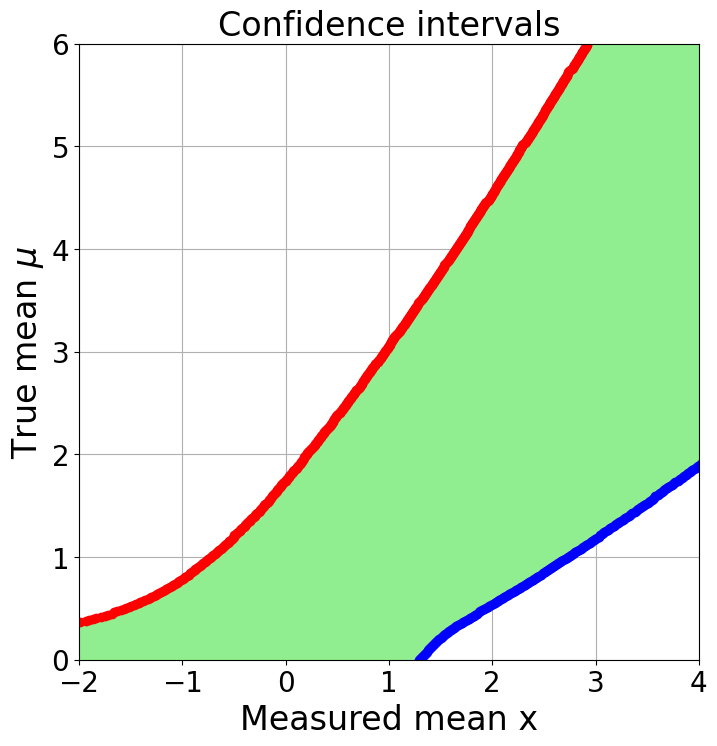

In [5]:
# Plot ranges

Xmin=-2
Xmax=4
Ymin=0
Ymax=6


plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval4_1.png'
plt.savefig(fname)


### (5) Hypothetical measurement

In [6]:
Xm = 2.3

# Look for limit point in the probability interval tables

iuh = np.argmax(Xm < vhig)
iul = np.argmax(Xm < vlow)

# Interpolate between points for higher precision (linear interpolation)

frac = (Xm-vlow[iul-1])/(vlow[iul]-vlow[iul-1])
ul=frac*vmean[iul]+(1-frac)*vmean[iul-1]
print('Upper limit : %.4f' % (ul))

frac = (Xm-vhig[iuh-1])/(vhig[iuh]-vhig[iuh-1])
ll = frac*vmean[iuh]+(1-frac)*vmean[iuh-1]
print('Lower limit : %.4f' % (ll))

Upper limit : 5.0206
Lower limit : 0.7205


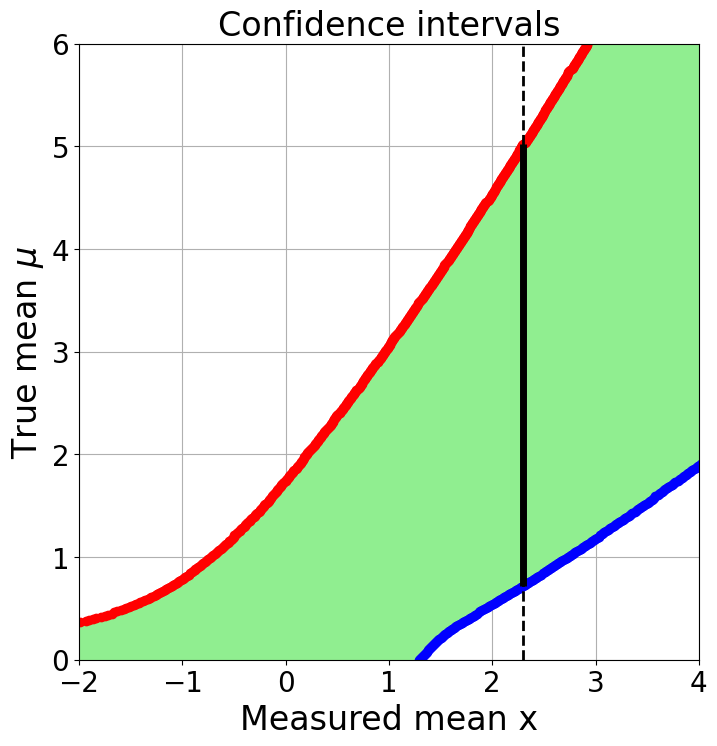

In [7]:
plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')

plt.vlines(Xm,Ymin,Ymax,color='black',linewidth=2,linestyles='dashed')
plt.vlines(Xm,ll,ul,color='black',linewidth=5,linestyles='solid')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval4_2.png'
plt.savefig(fname)
